It's similar to the previous models that you have used, but I have updated the layers definition. Note that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.

In [2]:
!pip install wget

In [3]:
import wget

In [6]:
"""
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
"""

'\n!wget --no-check-certificate     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip     -O /tmp/cats_and_dogs_filtered.zip\n'

In [5]:
!curl https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  3 65.4M    3 2366k    0     0  2402k      0  0:00:27 --:--:--  0:00:27 2402k
 11 65.4M   11 7438k    0     0  3747k      0  0:00:17  0:00:01  0:00:16 3747k
 20 65.4M   20 13.3M    0     0  4571k      0  0:00:14  0:00:02  0:00:12 4571k
 29 65.4M   29 19.2M    0     0  4958k      0  0:00:13  0:00:03  0:00:10 4958k
 38 65.4M   38 24.9M    0     0  5125k      0  0:00:13  0:00:04  0:00:09 5125k
 45 65.4M   45 29.9M    0     0  5129k      0  0:00:13  0:00:05  0:00:08 5667k
 55 65.4M   55 36.2M    0     0  5316k      0  0:00:12  0:00:06  0:00:06 5939k
 65 65.4M   65 42.5M    0     0  5456k      0  0:00:12  0:00:07  0:00:05 5984k
 74 65.4M   74 48.7M    0     0  5559k      0  0:00:12  0:00:08  0:00:04 6038k
 83 65.4M   83 54.9M    0     0  5622k      0  0:00

In [7]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
local_zip = 'E:/TensorflowDeveloperCertification/Learning/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('E:/TensorflowDeveloperCertification/Learning')
zip_ref.close()

In [10]:
base_dir = 'E:/TensorflowDeveloperCertification/Learning/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [11]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])


In [14]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 167s - loss: 0.6899 - accuracy: 0.5395 - val_loss: 0.7077 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 135s - loss: 0.6619 - accuracy: 0.6110 - val_loss: 0.6284 - val_accuracy: 0.6520
Epoch 3/100
100/100 - 138s - loss: 0.6097 - accuracy: 0.6660 - val_loss: 0.5930 - val_accuracy: 0.6950
Epoch 4/100
100/100 - 145s - loss: 0.5695 - accuracy: 0.7080 - val_loss: 0.5831 - val_accuracy: 0.6770
Epoch 5/100
100/100 - 127s - loss: 0.5350 - accuracy: 0.7255 - val_loss: 0.6008 - val_accuracy: 0.6490
Epoch 6/100
100/100 - 120s - loss: 0.5128 - accuracy: 0.7395 - val_loss: 0.5555 - val_accuracy: 0.7200
Epoch 7/100
100/100 - 121s - loss: 0.4753 - accuracy: 0.7765 - val_loss: 0.5874 - val_accuracy: 0.6870
Epoch 8/100
100/100 - 126s - loss: 0.4543 - accuracy: 0.7850 - val_loss: 0.5508 - val_accuracy: 0.7250
Epoch 9/100
100/100 - 125s - loss: 0.4216 - accuracy: 0.7970 - val_loss: 0.5417 - val_accuracy: 0.7420
Epoch 10/100
100/100 - 123s - loss: 0.4057 - accuracy: 0.8175 - val_loss:

Epoch 80/100
100/100 - 153s - loss: 5.6345e-04 - accuracy: 1.0000 - val_loss: 2.1944 - val_accuracy: 0.7390
Epoch 81/100
100/100 - 138s - loss: 0.0025 - accuracy: 0.9990 - val_loss: 2.2571 - val_accuracy: 0.7370
Epoch 82/100
100/100 - 142s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 2.2376 - val_accuracy: 0.7310
Epoch 83/100
100/100 - 150s - loss: 0.0011 - accuracy: 0.9995 - val_loss: 2.3541 - val_accuracy: 0.7370
Epoch 84/100
100/100 - 154s - loss: 0.0094 - accuracy: 0.9965 - val_loss: 2.3920 - val_accuracy: 0.7220
Epoch 85/100
100/100 - 147s - loss: 0.0098 - accuracy: 0.9980 - val_loss: 2.2784 - val_accuracy: 0.7440
Epoch 86/100
100/100 - 138s - loss: 3.5800e-05 - accuracy: 1.0000 - val_loss: 2.3828 - val_accuracy: 0.7390
Epoch 87/100
100/100 - 129s - loss: 0.0241 - accuracy: 0.9960 - val_loss: 2.3343 - val_accuracy: 0.7450
Epoch 88/100
100/100 - 145s - loss: 0.0020 - accuracy: 0.9990 - val_loss: 2.4341 - val_accuracy: 0.7520
Epoch 89/100
100/100 - 131s - loss: 1.7437e-05 - accurac

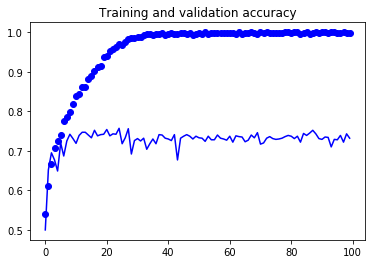

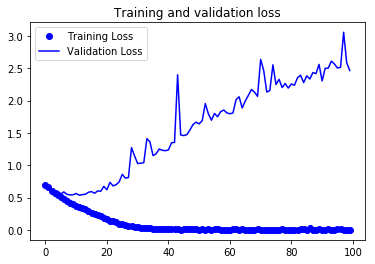

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc. That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image.

In [21]:
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
"""
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
"""

In [29]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = 'E:/TensorflowDeveloperCertification/Learning/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('E:/TensorflowDeveloperCertification/Learning')
zip_ref.close()

base_dir = 'E:/TensorflowDeveloperCertification/Learning/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [31]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 142s - loss: 0.6900 - accuracy: 0.5435 - val_loss: 0.6828 - val_accuracy: 0.5090
Epoch 2/100
100/100 - 146s - loss: 0.6746 - accuracy: 0.5645 - val_loss: 0.6456 - val_accuracy: 0.6200
Epoch 3/100
100/100 - 149s - loss: 0.6624 - accuracy: 0.5940 - val_loss: 0.6294 - val_accuracy: 0.6210
Epoch 4/100
100/100 - 149s - loss: 0.6291 - accuracy: 0.6360 - val_loss: 0.5912 - val_accuracy: 0.6770
Epoch 5/100
100/100 - 146s - loss: 0.6239 - accuracy: 0.6330 - val_loss: 0.5881 - val_accuracy: 0.6560
Epoch 6/100
100/100 - 155s - loss: 0.6167 - accuracy: 0.6490 - val_loss: 0.5789 - val_accuracy: 0.6980
Epoch 7/100
100/100 - 153s - loss: 0.5963 - accuracy: 0.6785 - val_loss: 0.5793 - val_accuracy: 0.6890
Epoch 8/100
100/100 - 144s - loss: 0.5862 - accuracy: 0.6935 - val_loss: 0.5586 - val_accuracy: 0.6970
Epoch 9/100
100/100 - 149s - loss: 0.5822 - accuracy: 0.6755 - val_loss: 0.5662 - val_accuracy: 0.7120
Epoch 10/100
100/100 - 145s - loss: 0.5777 - accuracy: 0.6925 - val_loss:

Epoch 80/100
100/100 - 133s - loss: 0.3735 - accuracy: 0.8220 - val_loss: 0.3946 - val_accuracy: 0.8210
Epoch 81/100
100/100 - 132s - loss: 0.3769 - accuracy: 0.8340 - val_loss: 0.4169 - val_accuracy: 0.8210
Epoch 82/100
100/100 - 132s - loss: 0.3695 - accuracy: 0.8325 - val_loss: 0.4007 - val_accuracy: 0.8170
Epoch 83/100
100/100 - 132s - loss: 0.3751 - accuracy: 0.8240 - val_loss: 0.4933 - val_accuracy: 0.7650
Epoch 84/100
100/100 - 133s - loss: 0.3736 - accuracy: 0.8225 - val_loss: 0.4070 - val_accuracy: 0.8010
Epoch 85/100
100/100 - 134s - loss: 0.3781 - accuracy: 0.8370 - val_loss: 0.4435 - val_accuracy: 0.7970
Epoch 86/100
100/100 - 134s - loss: 0.3808 - accuracy: 0.8355 - val_loss: 0.3969 - val_accuracy: 0.8110
Epoch 87/100
100/100 - 134s - loss: 0.3606 - accuracy: 0.8370 - val_loss: 0.4249 - val_accuracy: 0.8170
Epoch 88/100
100/100 - 134s - loss: 0.3694 - accuracy: 0.8285 - val_loss: 0.4036 - val_accuracy: 0.8110
Epoch 89/100
100/100 - 133s - loss: 0.3724 - accuracy: 0.8385 - 

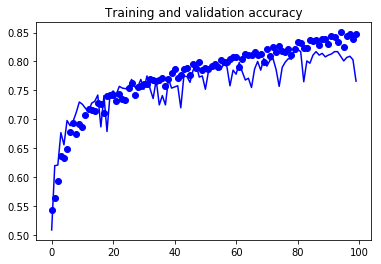

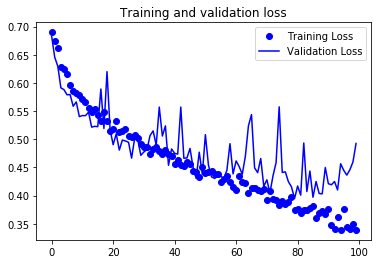

In [34]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()